# 3.2.2 RMSprop

The RMSprop (Root Mean Square Propagation) optimizer is designed to adapt the learning rate for each parameter dynamically. It is particularly effective in dealing with non-stationary and noisy gradients, which makes it suitable for training deep neural networks.


### Implementation

We will implement the RMSprop optimizer to minimize a simple quadratic function \( f(x) = (x - 3)^2 \). This function has a global minimum at \( x = 3 \), making it a straightforward test case for the optimization algorithm.


### RMSprop Algorithm Explanation

The RMSprop (Root Mean Square Propagation) optimizer is an adaptive learning rate method that adjusts the learning rate for each parameter. It helps to handle the varying scales of the gradients by normalizing them, which is particularly useful for training deep neural networks with non-stationary and noisy gradients.

### RMSprop Algorithm Steps

1. **Initialization**: Initialize the parameters, mean square gradient estimate (`v`), and time step (`t`).

2. **Gradient Calculation**: Compute the gradient of the objective function with respect to the parameters. Denote this gradient as \( g_t \).

3. **Mean Square Gradient Estimate**: Update the mean square gradient estimate using an exponentially decaying average:
   $$
   v_t = \beta v_{t-1} + (1 - \beta) g_t^2
   $$
   Here, \( \beta \) is a hyperparameter that controls the decay rate, typically set to 0.9.

4. **Parameter Update**: Update the parameters using the following rule:
   $$
   \theta_t = \theta_{t-1} - \frac{\alpha}{\sqrt{v_t + \epsilon}} g_t
   $$
   - &alpha; is the learning rate.
   - &epsilon; is a small constant added to avoid division by zero (typically \( 1 \times 10^{-8} \)).
   - &theta; are the updated parameters at iteration \( t \).

The use of the moving average of squared gradients helps to normalize the gradient updates, ensuring that the learning rate is adapted based on the magnitude of recent gradients. This prevents large updates that can destabilize the training process and allows for a more robust convergence.


## Readings:

- [Visual Explanation of Gradient Descent Methods (Momentum, AdaGrad, RMSProp, Adam)](https://towardsdatascience.com/a-visual-explanation-of-gradient-descent-methods-momentum-adagrad-rmsprop-adam-f898b102325c)
- [Optimizers: SGD, RMSprop, Adam, Adagrad](https://readmedium.com/en/https:/ai.plainenglish.io/dl-tutorial-31-optimizers-sgd-rmsprop-adam-adagrad-f982b4010fbe) 
- [Root Mean Squared Propagation (RMSprop)](https://readmedium.com/en/https:/cdanielaam.medium.com/18-optimization-root-mean-squared-propagation-or-rmsprop-ed06171936d8)
- [What is RMSprop?](https://medium.com/thedeephub/what-is-rmsprop-0f54effc47e4)
- [Learning Parameters - AdaGrad, RMSProp, and Adam](https://towardsdatascience.com/learning-parameters-part-5-65a2f3583f7d)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Quadratic function
def f(x):
    return (x - 3)**2

# Gradient of the quadratic function
def grad_f(x):
    return 2 * (x - 3)

In [3]:
# RMSprop Optimizer parameters
learning_rate = 0.1
beta = 0.9
epsilon = 1e-8
n_iterations = 100
x_init = 0.0

In [4]:
# Initialize parameters
x_rmsprop = x_init
v = 0
rmsprop_history = [x_rmsprop]
costs = [f(x_rmsprop)]

In [5]:
# RMSprop Optimization loop
for _ in range(n_iterations):
    g = grad_f(x_rmsprop)
    
    # Update mean square gradient estimate
    v = beta * v + (1 - beta) * g**2
    
    # Update parameters
    x_rmsprop = x_rmsprop - learning_rate * g / (np.sqrt(v) + epsilon)
    rmsprop_history.append(x_rmsprop)
    costs.append(f(x_rmsprop))

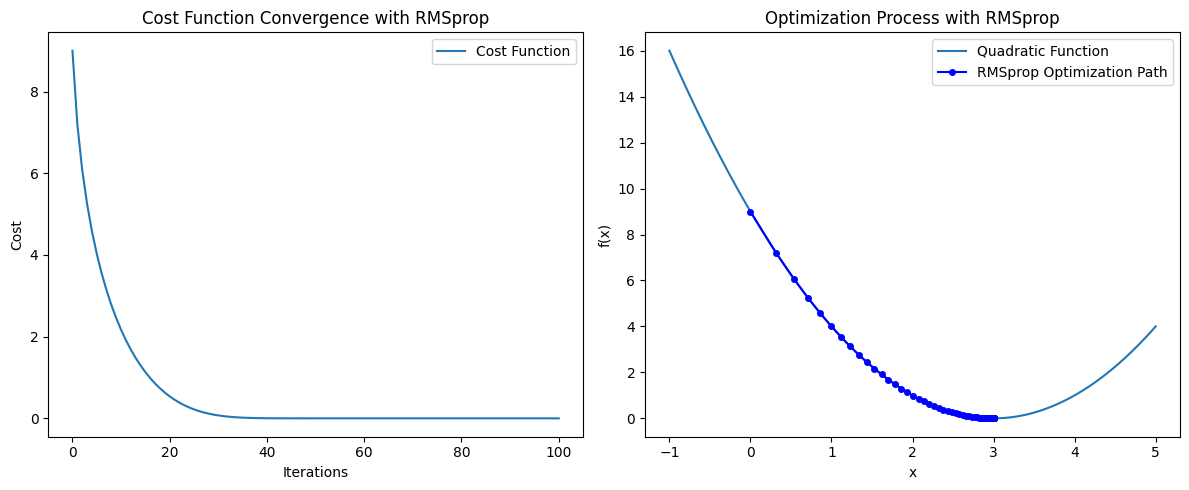

In [6]:
# Plotting the cost function
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(costs, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence with RMSprop')
plt.legend()

# Visualization of the optimization process
plt.subplot(1, 2, 2)
x_vals = np.linspace(-1, 5, 400)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label='Quadratic Function')
rmsprop_history = np.array(rmsprop_history)
plt.plot(rmsprop_history, f(rmsprop_history), 'bo-', label='RMSprop Optimization Path', markersize=4)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Optimization Process with RMSprop')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Output the final parameter
print(f"Parameters after {n_iterations} iterations: {x_rmsprop}")

Parameters after 100 iterations: 3.0


## Conclusion

The RMSprop optimizer is an adaptive learning rate method that helps to manage the varying scales of the gradients by normalizing them. It is particularly effective for training deep neural networks due to its ability to handle noisy and non-stationary gradients. By adjusting the learning rate based on the average of the squared gradients, RMSprop ensures stable and efficient convergence. The implementation demonstrates how RMSprop can effectively minimize a simple quadratic function, highlighting its practical utility in optimization problems.
